Valid for ping 0.25 (25/10/2024)

## Data access core concepts

In [31]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as pingmachine
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

### 1. List raw data files with find_files()

In [32]:
# define a folder to search for raw data files
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# find all Kongsberg files in the list of folders
files = pingmachine.echosounders.index_functions.find_files(folder, [".all","wcd"])

Found 8 files


In [33]:
# The output of find_files() is a list of file paths, which are strings
print(type(files))
print(type(files[0]))
print(files[0])

<class 'list'>
<class 'str'>
C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0225_20240427_083531.all


In [34]:
# show files found
files.sort()
for i, file in enumerate(files):
    print(f"({i}/{len(files)}) {file}")

(0/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0225_20240427_083531.all
(1/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0225_20240427_083531.wcd
(2/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0266_20240429_171944.all
(3/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0266_20240429_171944.wcd
(4/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0298_20240430_072549.all
(5/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0298_20240430_072549.wcd
(6/8) C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD\0330_20240430_140406.all
(7/8) C:\User

### 2. Create a File Handler object to access the raw data files

In [35]:
# Create a File Handler to access the raw data files
fileHandler = pingmachine.echosounders.kongsbergall.KongsbergAllFileHandler(files)

indexing files ⠐ 100% :00s<00m:00s] [.._20240427_083531.all (1/8)]                              
indexing files ⠠ 100% :00s<00m:00s] [.._20240430_140406.wcd (8/8)]                              
indexing files ⢀ 100% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing ping interface ⠄ 75% :00s<00m:00s] [Done]                                              


In [36]:
# Notes:
#   - A File Handler does not load the data. It only indexes it and provides access to them as a combined file stream
#   - A file Handler is initalized with the list of files
#   - A File Handler pairs .all and .wcd files

# See class of a File Hander
type(fileHandler)

themachinethatgoesping.echosounders_cppy.kongsbergall.KongsbergAllFileHandler

In [37]:
# Use the print function to get a summary of the dataset that can be accessed with the File Handler
print(fileHandler)

KongsbergAllFileHandler
#######################
-
File infos 
-------------                
- Number of loaded .all files: : 4         
- Number of loaded .wcd files: : 4         
- Total file size: :             258.73 MB 

 Detected datagrams 
^^^^^^^^^^^^^^^^^^^^ 
- timestamp_first:  27/04/2024 08:35:30.79 
- timestamp_last:   30/04/2024 14:05:32.41 
- Total:            7463                   
- Datagrams [0x30]: 8                      [PUIDOutput]
- Datagrams [0x31]: 40                     [PUStatusOutput]
- Datagrams [0x41]: 39                     [AttitudeDatagram]
- Datagrams [0x43]: 42                     [ClockDatagram]
- Datagrams [0x47]: 1                      [SurfaceSoundSpeedDatagram]
- Datagrams [0x49]: 8                      [InstallationParametersStart]
- Datagrams [0x4e]: 836                    [RawRangeAndAngle]
- Datagrams [0x50]: 39                     [PositionDatagram]
- Datagrams [0x52]: 14                     [RuntimeParameters]
- Datagrams [0x55]: 8           

### 3. Access a group of pings with the File Handler

In [38]:
# Access a group of pings from the File Handler with the get_pings() method
pingContainer = fileHandler.get_pings()

# The output is a Ping Container object
type(pingContainer)

themachinethatgoesping.echosounders_cppy.kongsbergall.filedatacontainers.KongsbergAllPingContainer

In [39]:
# Use the print function to get a summary of the contents of a Ping Container
print(pingContainer)

PingContainer
#############
-
Time info 
------------            
- Start time: 27/04/2024 08:35:31.24 
- End time:   30/04/2024 14:04:11.90 
- Sorted:     ascending              

 Contained pings 
----------------- 
- Total:   836 
- TRX-333: 418 
- TRX-335: 418 


### 4. Access an individual ping in the Ping Container


In [40]:
# Access an individual ping in a Ping Container simply by indexing
ping = pingContainer[42]

# The result is a Ping object
type(ping)

themachinethatgoesping.echosounders_cppy.kongsbergall.filetypes.KongsbergAllPing

In [41]:
# Use the print function to get a summary of the contents of a Ping object
print(ping)

KongsbergAllPing
################
-
Ping infos 
-------------                                                                                                                                                                                                                                                                                                                                                                                 
- Channel id:             TRX-333                                                                                                                                                                                                                                                                                                                                                                           
- Time info:              27/04/2024 08:35:33.13                                                                                                                            

### 5. Access data in a ping

In [42]:
# A Ping object has 3 types of information: base, bottom, and water-column. Let's just talk here about the base information

# An example of base information is location
pingLocation = ping.get_geolocation()

# see class of a "Ping Location" object
type(pingLocation)

themachinethatgoesping.navigation.datastructures.GeolocationLatLon

In [43]:
# Use the print function to get a summary of the contents of a Ping Location
print(pingLocation)

GeolocationLatLon (struct)
##########################
- latitude:  56°37'17.4"N  [ddd°mm',ss.s''N/S]
- longitude: 4°37'54.9"E   [ddd°mm',ss.s''E/W]
- z:         3.981         [positive downwards, m]
- yaw:       354.200       [90 ° at east]
- pitch:     -0.799        [° positive bow up]
- roll:      -25.354       [° positive port up]


In [44]:
# Data in a Ping Location are simple attributes
print(f"Example ping location - Latitude: {pingLocation.latitude}, Longitude: {pingLocation.longitude}")

Example ping location - Latitude: 56.62150634373657, Longitude: 4.63191275840126


### 6. Conclusion
Putting it all together with an example. If you want to extract latitudes and longitudes from all pings in the entire dataset

Found 8 files
indexing files ⠐ 100% :00s<00m:00s] [.._20240427_083531.all (1/8)]                              
indexing files ⠠ 100% :00s<00m:00s] [.._20240430_140406.wcd (8/8)]                              
indexing files ⢀ 100% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing ping interface ⠄ 75% :00s<00m:00s] [Done]                                              


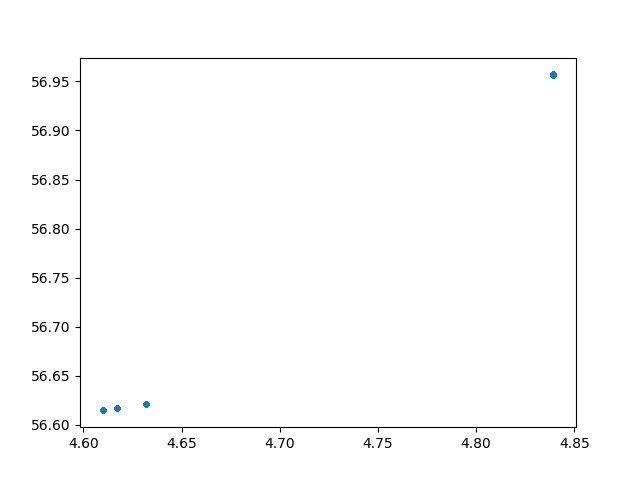

In [45]:
# set folders of data
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# list files in folder
files = pingmachine.echosounders.index_functions.find_files(folder, [".all","wcd"]) # find all Kongsberg files in the list of folders

# create a ping container for all pings in the dataset, through a File Handler
fileHandler = pingmachine.echosounders.kongsbergall.KongsbergAllFileHandler(files)
pingContainer = fileHandler.get_pings()

# loop over all pings in the pingContainer and extract latitude and longitude of each ping
lat, lon = [], []
for ping in pingContainer:
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')